Import packages

In [672]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from datetime import date, timedelta as td, datetime as dt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [673]:
#read in the data
df = pd.read_csv('C:/Users/kayode_kobo360/Desktop/Python Practice/hotel_bookings.csv')

## Here's a dataset containg information of bookings from Hotel XYZ. Our challenge is to analyze the data and help them draw out meaningful insights from the data.

Below is way to navigate the data.

- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record. 
- meal: Type of meal chosen 
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for 
                     Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed 
- reservation_status_date: Date of making reservation status.

## Exploration

In [674]:
#count of he data set
df.shape

(119390, 32)

In [675]:
#see the data set
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03


In [676]:
#understand the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [677]:
#see empty fields
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [678]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119386.00,119390.00,119390.00,119390.00,119390.00,119390.00,103050.00,6797.00,119390.00,119390.00,119390.00,119390.00
mean,0.37,104.01,2016.16,27.17,15.80,0.93,2.50,1.86,0.10,0.01,0.03,0.09,0.14,0.22,86.69,189.27,2.32,101.83,0.06,0.57
std,0.48,106.86,0.71,13.61,8.78,1.00,1.91,0.58,0.40,0.10,0.18,0.84,1.50,0.65,110.77,131.66,17.59,50.54,0.25,0.79
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,6.00,0.00,-6.38,0.00,0.00
25%,0.00,18.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,62.00,0.00,69.29,0.00,0.00
50%,0.00,69.00,2016.00,28.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00,179.00,0.00,94.58,0.00,0.00
75%,1.00,160.00,2017.00,38.00,23.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,229.00,270.00,0.00,126.00,0.00,1.00
max,1.00,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.00,10.00,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00


Might be interesting to take a look at unique values in some fields.

In [679]:
#help quickly glance over the df
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [680]:
df.hotel.unique()
# there are only two hotels in this set

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [681]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [682]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [683]:
df.is_repeated_guest.unique()

array([0, 1], dtype=int64)

In [684]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [685]:
df.children.unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [686]:
df.babies.unique()
#as much as 10 babies brought to the hotel by a couple.. interesting.

array([ 0,  1,  2, 10,  9], dtype=int64)

In [687]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

## Data Cleaning

Let's start by taking out duplicate rows

In [688]:
#see duplicate rows
df[df.duplicated()]
#df.duplicated().shape

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.00,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.00,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.00,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.00,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.00,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.00,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.00,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.00,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [689]:
#drop duplicates
df.drop_duplicates(inplace = True)
df.shape

(87396, 32)

In [690]:
df.isnull().sum().sort_values(ascending = False)[0:15]

company                        82137
agent                          12193
country                          452
children                           4
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
deposit_type                       0
hotel                              0
previous_cancellations             0
days_in_waiting_list               0
customer_type                      0
adr                                0
required_car_parking_spaces        0
total_of_special_requests          0
dtype: int64

It makes sense for the company and agent field to be empty. It could mean that the reservation was made directly by the customer.
We can go ahead and fill with 0

In [691]:
df[['agent','company']] = df[['agent','company']].fillna(0)
df.isnull().sum().sort_values(ascending = False)[:15]

country                        452
children                         4
hotel                            0
agent                            0
reserved_room_type               0
assigned_room_type               0
booking_changes                  0
deposit_type                     0
company                          0
previous_cancellations           0
days_in_waiting_list             0
customer_type                    0
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
dtype: int64

We can replace null country with 'n/a'

In [692]:
df['country'] = df['country'].fillna(0)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [693]:
df['children'].fillna(df['children'].mean(), inplace = True)
df.isna().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [694]:
#We can now ensure data types are accurately set
df[['children', 'agent','company']] = df[['children', 'agent','company']].astype('int64')
df.info()
#the reason is simple, we need the need them all in intiger data type to perform analysis on them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [695]:
df[['arrival_date_year','arrival_date_month','reservation_status_date']]
df['reservation_status_date'] =pd.to_datetime(df['reservation_status_date'],format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  b

In [696]:
#let's sum up all individuals into one field
df[['adults','children','babies']]
df['total_people'] = df['adults'] + df['children'] +df['babies']


In [697]:
#let's sum up all days stayed into one field
df['total_stay'] =df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [698]:
df.drop(df[df['adults'] + df['children'] +df['babies'] == 0].index,inplace = True)

In [699]:
#let's create two additional fields for couples and family
# type_of_customer = []
# for a,b,c in zip(df.adults, df.children, df.babies):
#     if a == 1:
#         if b == 0:
#             if c == 0:
#                 type_of_customer.append('single')
#     elif a > 1:
#         if b == 0:
#             if c == 0:
#                 type_of_customer.append('couple')
#     elif a >= 1:
#         if b >= 1:
#             if c >= 1:
#                 type_of_customer.append('family')     
#     else:
#         type_of_customer.append(None)


type_of_customer = []
for a,b,c in zip(df.adults, df.children, df.babies):
    if a == 1 and b == 0 and c == 0:
                type_of_customer.append('single')
    elif a > 1 and b == 0 and c == 0:
                type_of_customer.append('couple')
    elif a >= 1 and b >= 1 and c >= 1:
                type_of_customer.append('family')     
    else:
        type_of_customer.append(None)
        
df['type_of_customer'] = type_of_customer

In [700]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay', 'type_of_customer'],
      dtype='object')

In [701]:
#drop unnecessary columns since we have created replacements
df_nu = df.drop(columns =['stays_in_weekend_nights','stays_in_week_nights','adults', 'children', 'babies'])
clean = df_nu[df_nu['is_canceled'] != 1] #lets separate uncancelled trips
cancelled = df_nu[df_nu['is_canceled'] == 1] #JKBJKAD

In [702]:
clean.drop(clean[clean['adr'] > 3000].index, inplace = True)
clean.drop(clean[clean['adr'] <= 0].index, inplace = True)
clean[df_nu['adr'] == clean['adr'].max()]
clean

C:\Users\KAYODE~2\AppData\Local\Temp/ipykernel_14892/3523706789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.drop(clean[clean['adr'] > 3000].index, inplace = True)
C:\Users\KAYODE~2\AppData\Local\Temp/ipykernel_14892/3523706789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.drop(clean[clean['adr'] <= 0].index, inplace = True)
C:\Users\KAYODE~2\AppData\Local\Temp/ipykernel_14892/3523706789.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean[df_nu['adr'] == clean['adr'].max()]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay,type_of_customer
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1,single
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1,single
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2,couple
6,Resort Hotel,0,0,2015,July,27,1,BB,PRT,Direct,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,2,2,couple
7,Resort Hotel,0,9,2015,July,27,1,FB,PRT,Direct,...,0,Transient,103.00,0,1,Check-Out,2015-07-03,2,2,couple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,BB,BEL,Offline TA/TO,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,2,7,couple
119386,City Hotel,0,102,2017,August,35,31,BB,FRA,Online TA,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,3,7,couple
119387,City Hotel,0,34,2017,August,35,31,BB,DEU,Online TA,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,2,7,couple
119388,City Hotel,0,109,2017,August,35,31,BB,GBR,Online TA,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,2,7,couple


In [703]:
df_nu.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay', 'type_of_customer'],
      dtype='object')

## Analysis

Which of the hotels gets booked the most?

In [704]:
#let's see a count
grpd = clean.groupby(['hotel'])
grpd.size()

hotel
City Hotel      36382
Resort Hotel    25364
dtype: int64

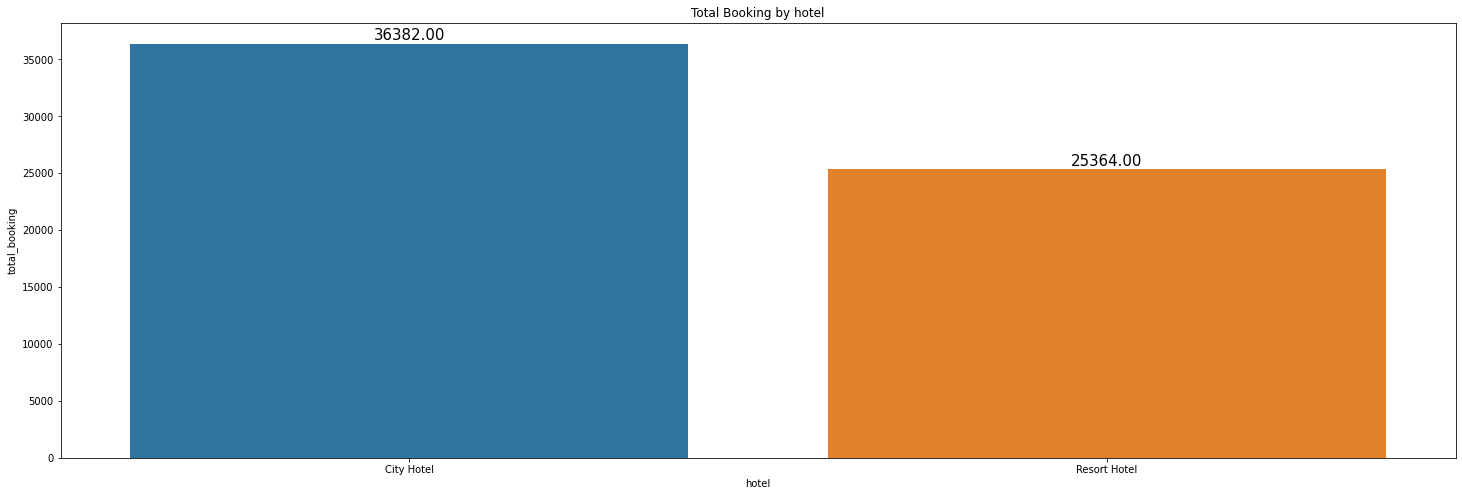

In [705]:
# graph might be more appealing
booking = pd.DataFrame(grpd.size()).rename(columns = {0 : 'total_booking'}).reset_index()
plt.figure(figsize =(25, 8))
plot = sbn.barplot(x = booking['hotel'], y = booking['total_booking'])
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title("Total Booking by hotel")

plt.show()

In [706]:
((53274/33956)-1)*100

56.891271056661566

City hotel is 56% more likely to get booked than Resort Hotel. 

What agent makesthe most bookings and how much did they generate? 

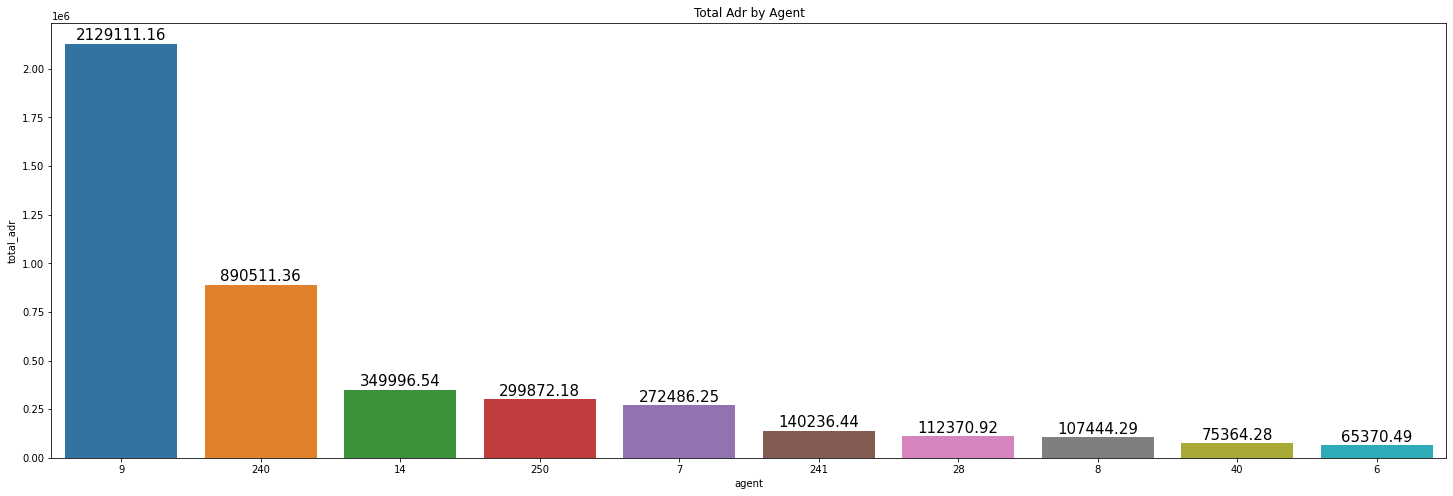

In [707]:
##agents = df.DataFrame()
agent = clean.groupby('agent').agg({'hotel' : 'count', 'adr' : 'sum'}).reset_index()
agent.drop(agent[agent['agent'] == 0].index,inplace = True)
agent.rename(columns ={'hotel' : 'count', 'adr':"total_adr"},inplace = True)
agent.sort_values('count', ascending = False, inplace = True)
agent = agent.reset_index(drop = True).head(10)

plt.figure(figsize =(25, 8))
plot = sbn.barplot(x = agent['agent'], y = agent['total_adr'], order = agent.sort_values('total_adr', ascending = False).agent)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title("Total Adr by Agent")

plt.show()




Agent 9 has the highest adr recorded, let's see if they also contribute the most in bookings.

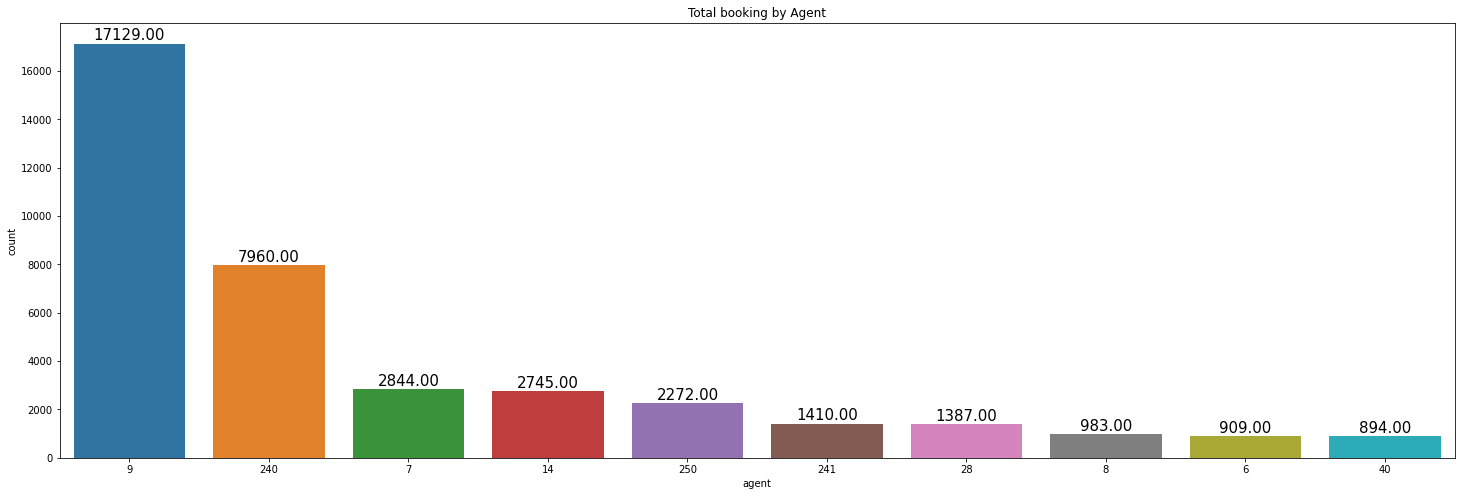

In [708]:
plt.figure(figsize =(25, 8))
plot = sbn.barplot(x = agent['agent'], y = agent['count'], order = agent.sort_values('count', ascending = False).agent)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title("Total booking by Agent")

plt.show()

Agent 9 also has the highest of reservations booked by them.

What room is the most booked?

In [709]:
rooms =clean.groupby('assigned_room_type').agg({'adr':['count', 'sum', 'mean','max','min']}).reset_index()
rooms.columns = ['room_type', 'bookings', 'total_adr', 'avg_adr', 'max_adr', 'min_adr']
rooms #an overview of metrics by the room type

,room_type,bookings,total_adr,avg_adr,max_adr,min_adr
0,A,31521,3009074.14,95.46,337.00,1.00
1,B,1361,135225.55,99.36,276.00,1.00
2,C,1727,193512.43,112.05,508.00,4.00
3,D,16724,1736164.20,103.81,375.50,1.00
4,E,5399,620423.75,114.91,451.50,2.00
5,F,2645,391550.75,148.03,368.10,2.00
6,G,1657,277074.84,167.21,510.00,1.00
7,H,445,72462.16,162.84,402.00,6.00
8,I,156,14097.79,90.37,310.20,0.26
9,K,111,12504.85,112.66,283.23,47.33


It seems that while A has the most bookings and adr generated, G has the highest average adr. Let's visualize this.

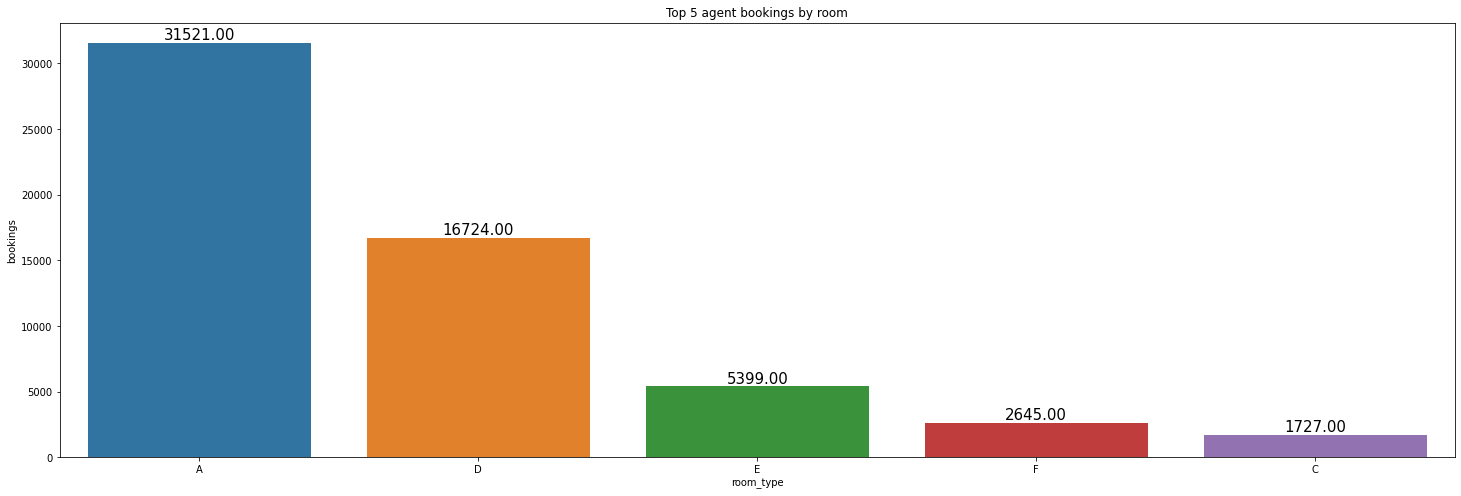

In [710]:
t5r_bkns = rooms.sort_values('bookings',ascending = False).head(5)
t5r_bkns

plt.figure(figsize =(25, 8))
plot = sbn.barplot(x = t5r_bkns['room_type'], y = t5r_bkns['bookings'], order=t5r_bkns.sort_values('bookings', ascending = False).room_type )
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title("Top 5 agent bookings by room")

plt.show()

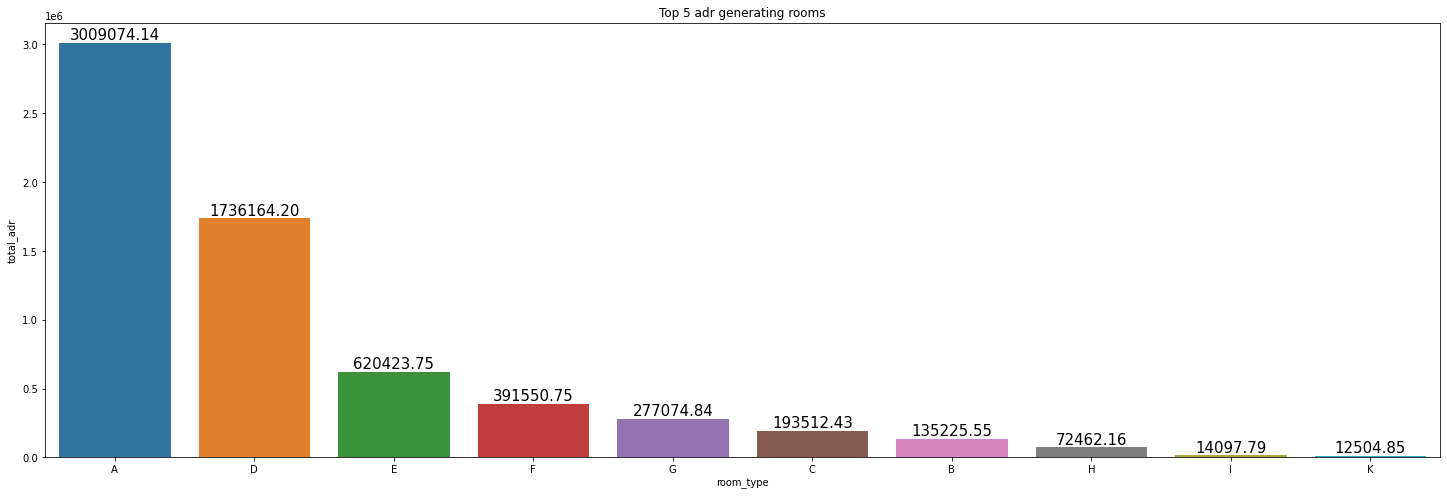

In [711]:
t5r_adr = rooms.sort_values('total_adr', ascending = False).reset_index(drop = True)
t5r_adr

plt.figure(figsize =(25, 8))
plot = sbn.barplot(x = t5r_adr['room_type'], y = t5r_adr['total_adr'], order=t5r_adr.sort_values('total_adr', ascending = False).room_type )
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title("Top 5 adr generating rooms")

plt.show()

<AxesSubplot:xlabel='assigned_room_type', ylabel='adr'>

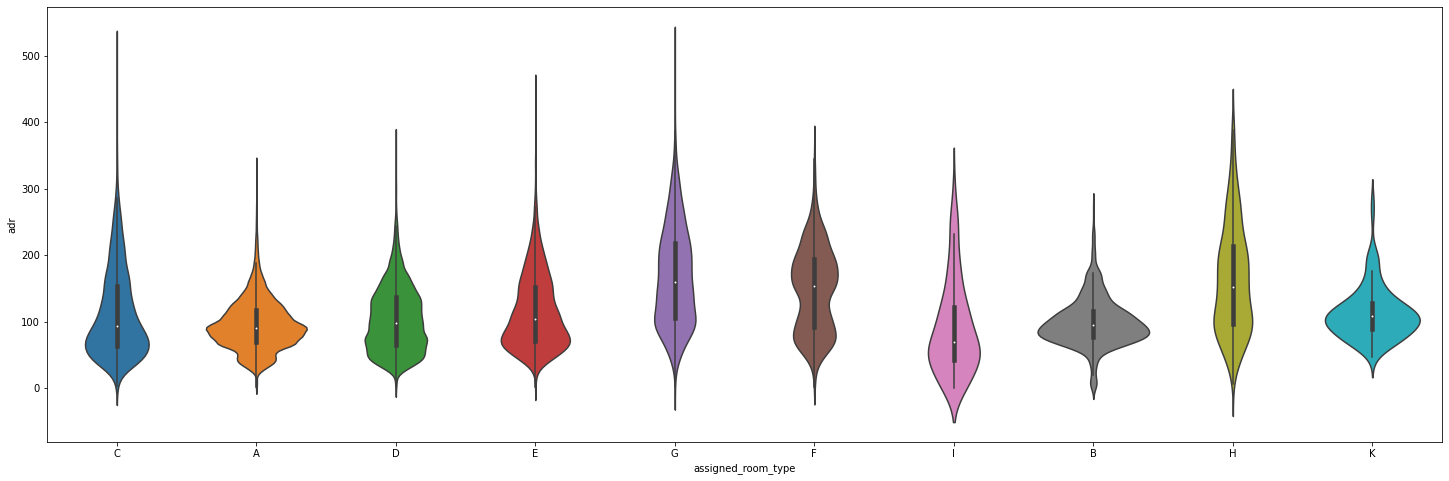

In [721]:
plt.figure(figsize =(25,8))
sbn.violinplot(x = clean['assigned_room_type'], y = clean['adr'])

In [713]:
clean.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay', 'type_of_customer'],
      dtype='object')

<AxesSubplot:xlabel='total_stay', ylabel='count'>

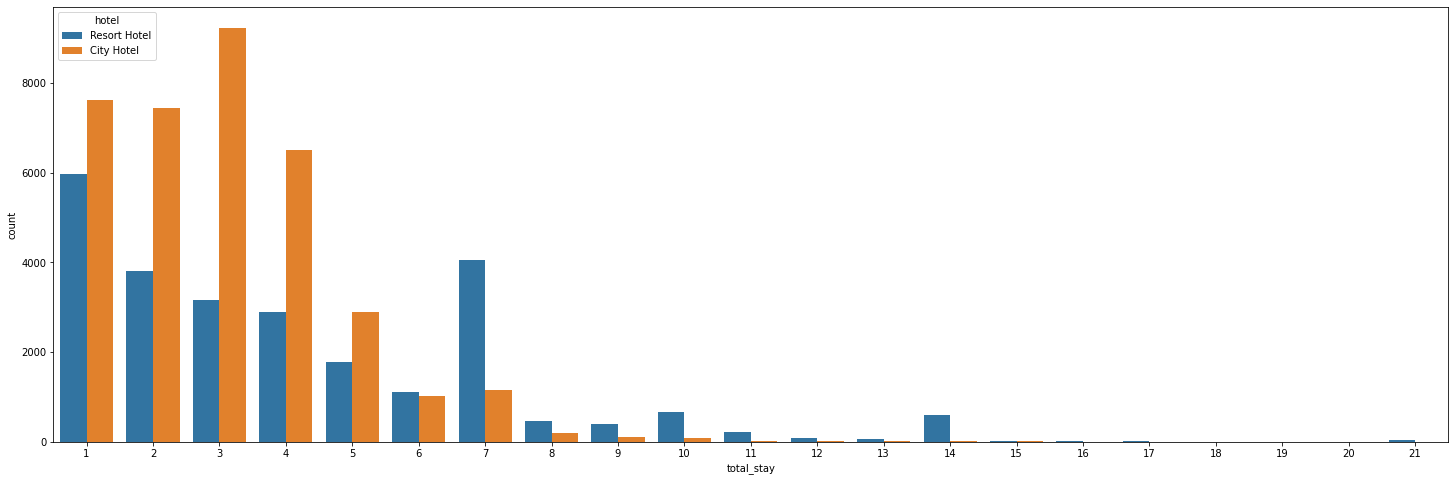

In [714]:
stay = clean[clean['total_stay'] < 22]
plt.figure(figsize=(25,8))
sbn.countplot(x = stay['total_stay'], hue = stay['hotel'])

City hotel seems to house more people who prefer shortter stay. 

Let's take a look at what our cancelled boooking tells us

In [716]:
cancelled.shape[0] / df_nu.shape[0]

0.2752378768772211

About 28% of booked reservations have been cancelled.

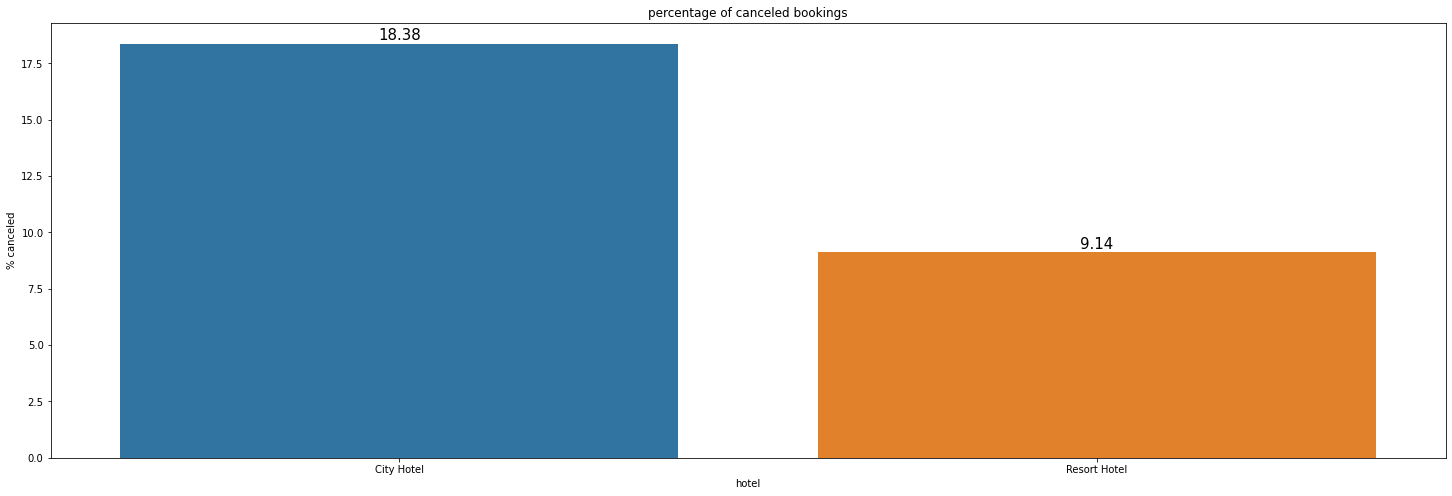

In [717]:
cancelled = df_nu[df_nu['is_canceled'] != 0]
c1 = pd.DataFrame((canceled.groupby('hotel').size()/ df_nu.shape[0])*100).reset_index().rename(columns = {0:'% canceled'})
plt.figure(figsize =(25, 8))
plot = sbn.barplot(x = c1['hotel'], y = c1['% canceled'] )
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title("percentage of canceled bookings")

plt.show()

City hotel having the highest number of cancellations is unsurprisng seeing as it has the highest number of bookings.

In [ ]:
cancelled.columns

<AxesSubplot:xlabel='type_of_customer', ylabel='hotel'>

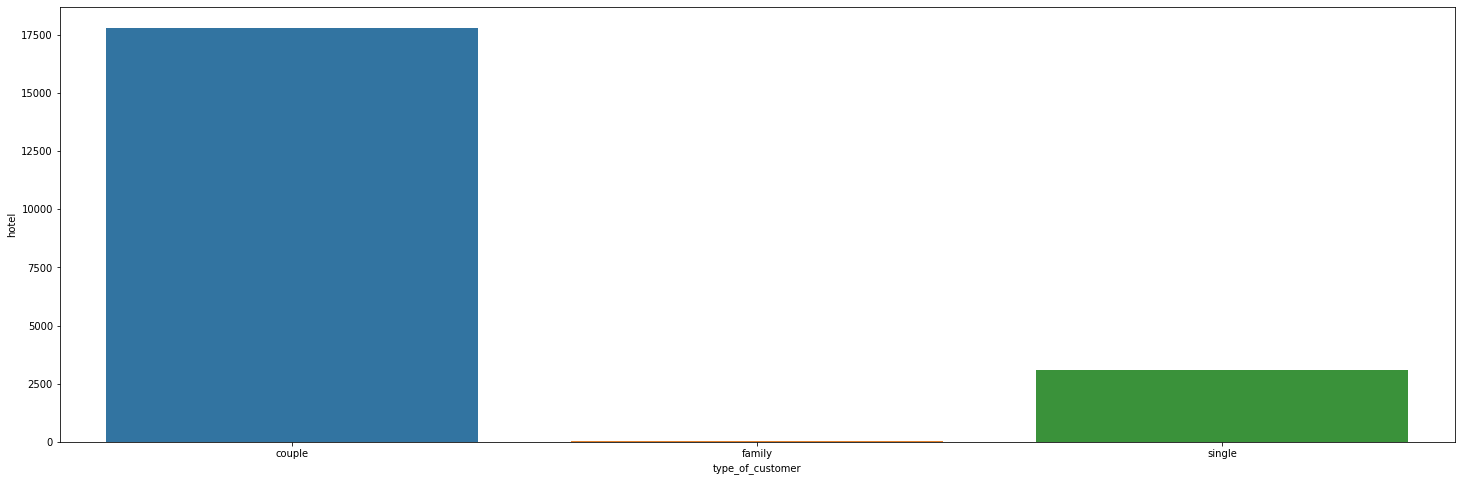

In [718]:
cancelled = cancelled[cancelled['adr'] < 3000]
plt.figure(figsize =(25, 8))
# sbn.violinplot(x=cancelled['type_of_customer'], y = cancelled['adr'])
custo_group = cancelled.groupby('type_of_customer').agg({'hotel': 'count'}).reset_index()
sbn.barplot(x=custo_group['type_of_customer'], y = custo_group['hotel'])